### Importing the required Python libraries to the notebook.

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import pandas as pd

import sklearn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt

In [48]:
import pandas as pd
import numpy as np
import warnings
import regex as re
warnings.filterwarnings('ignore')#to filter all the warnings
import seaborn as sns
pd.set_option('float_format', '{:.4f}'.format)# to keep the float values short
# Import for wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#import fot plotly
import plotly.express as px

### Reading the data file (video_data.csv) into a Pandas data frame

In [49]:
dft = pd.read_csv('video_data.csv')

### Displaying the first five data points of the file

In [50]:
dft.head()

,Likes,Dislikes,Subscribers,Views
0,104460,3365,7300000,1988888
1,103203,3570,3300000,2617005
2,22485,612,1800000,932230
3,23077,1337,465000,1165800
4,12315,522,11000000,551165


### Obtaining the descriptive statistics of no of likes, no of dislikes, no of subscribers and no of views.

In [51]:
dft.describe()

,Likes,Dislikes,Subscribers,Views
count,3364.0000,3364.0000,3364.0000,3364.0000
mean,129826.5012,11773.4837,2486401.1061,21106724.8534
std,584579.5530,185765.1168,5676479.2923,114387832.7262
min,0.0000,0.0000,0.0000,12.0000
25%,585.0000,28.0000,46000.0000,38315.2500
50%,5535.0000,220.5000,391000.0000,449369.0000
75%,40927.5000,2059.0000,1800000.0000,4022392.5000
max,10242048.0000,9653039.0000,71000000.0000,2668027074.0000


### Drawing the scatter plots that show the no of views against the no of likes, no of dislikes and no of subscribers.

### Plot 1 -  No of views Vs. No of likes




Text(0, 0.5, 'No. of Views')

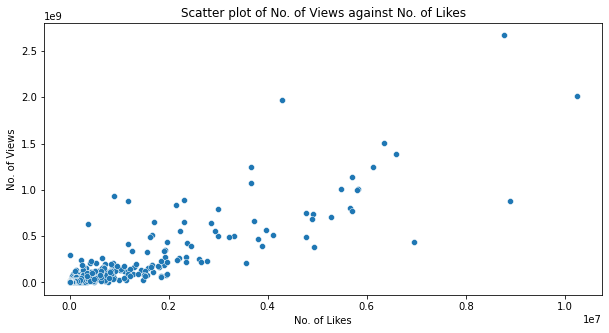

In [52]:
plot1= sns.scatterplot(data=dft, x="Likes", y="Views")
plot1.set_title( "Scatter plot of No. of Views against No. of Likes")
plot1.set_xlabel( "No. of Likes")
plot1.set_ylabel( "No. of Views")

###Plot 2 - No of views Vs. No of dislikes

Text(0, 0.5, 'No. of Views')

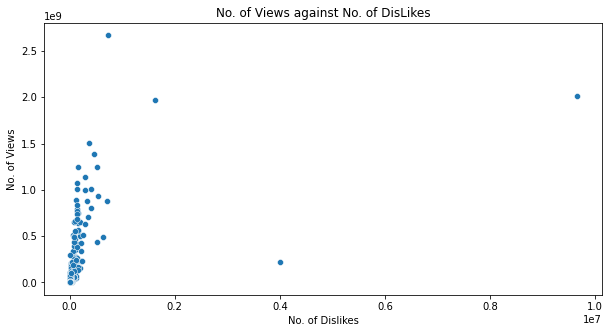

In [53]:
plot2= sns.scatterplot(data=dft, x="Dislikes", y="Views")
plot2.set_title( "No. of Views against No. of DisLikes")
plot2.set_xlabel( "No. of Dislikes")

plot2.set_ylabel( "No. of Views")

###Plot 3 -  No of views Vs. No of subscribers

Text(0, 0.5, 'No. of Views')

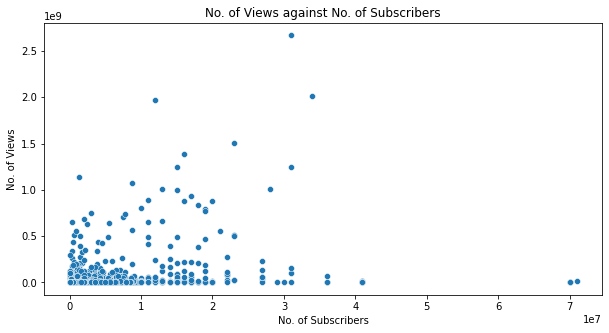

In [54]:
plot3= sns.scatterplot(data=dft, x="Subscribers", y="Views")
plot3.set_title( "No. of Views against No. of Subscribers")
plot3.set_xlabel( "No. of Subscribers")
plot3.set_ylabel( "No. of Views")

### Splitting the dataset into two datasets for the training and testing

In [55]:
dft_train, dft_test = train_test_split(dft, test_size=0.2)

### Scale training and testing data (no of likes, no of dislikes and no of subscribers) of the training dataset to mean 0 and standard deviation 1 to provide a common ground


In [56]:
X_train = dft_train[["Likes", "Dislikes", "Subscribers"]].copy()
Y_train = dft_train[["Views"]].copy()
X_test = dft_test[["Likes", "Dislikes", "Subscribers"]].copy()
Y_test = dft_test[["Views"]].copy()

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

### Designing a linear regression model using the training dataset

<b><u>Note:</u></b> Add “\_reg” suffix to each variable you define for the regression model as in “model\_reg” here after.

In [57]:
model_reg = Sequential()
model_reg.add(Dense(1, input_shape=(3,), activation = 'linear'))
model_reg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### Compiling the model using “Adam” optimizer with the learning rate 10,000 and loss as mean squared error.

In [58]:
model_reg.compile(Adam(lr=10000), 'mean_squared_error')

### Fit the model using the training dataset using batch size as 32, no of epochs as 1000 and verbose as 1.

In [59]:
history_reg = model_reg.fit(X_train, Y_train, epochs = 1000,  verbose = 1)

Epoch 1/1000
85/85 [==============================] - 0s 1ms/step - loss: 12460516169482240.0000
Epoch 2/1000
85/85 [==============================] - 0s 2ms/step - loss: 12324303429173248.0000
Epoch 3/1000
85/85 [==============================] - 0s 1ms/step - loss: 12182828280184832.0000
Epoch 4/1000
85/85 [==============================] - 0s 1ms/step - loss: 12049253723537408.0000
Epoch 5/1000
85/85 [==============================] - 0s 1ms/step - loss: 11918515992788992.0000
Epoch 6/1000
85/85 [==============================] - 0s 1ms/step - loss: 11792227848159232.0000
Epoch 7/1000
85/85 [==============================] - 0s 1ms/step - loss: 11664530954256384.0000
Epoch 8/1000
85/85 [==============================] - 0s 1ms/step - loss: 11540376334630912.0000
Epoch 9/1000
85/85 [==============================] - 0s 1ms/step - loss: 11418079288360960.0000
Epoch 10/1000
85/85 [==============================] - 0s 1ms/step - loss: 11301392543121408.0000
Epoch 11/1000
85/85 [========

### Plotting the loss of the training process against the epochs.

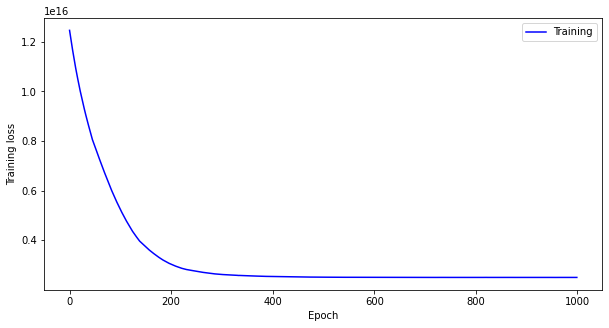

In [60]:
history_dict_reg = history_reg.history
loss_reg = history_dict_reg['loss']
plt.figure()
plt.plot(loss_reg, 'b')
plt.legend(['Training'])
plt.ylabel("Training loss")
plt.xlabel("Epoch")
plt.show()

### Getting the predicted no of views for the training and testing datasets

In [61]:
Y_train_pred_reg = model_reg.predict(X_train)
Y_test_pred_reg = model_reg.predict(X_test)

### Scatter plots that show the predicted no of views against the original no of views for the training and testing datasets

###Plot 1 - Predicted no of views Vs. Original no of views for the training dataset)

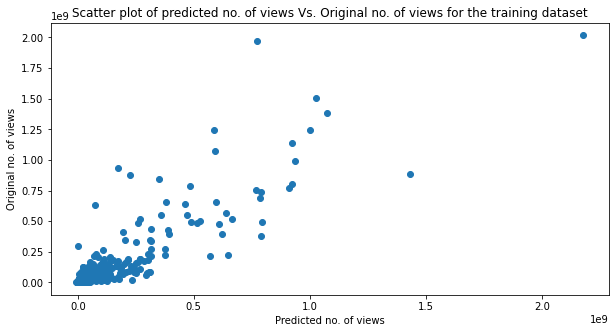

In [62]:
plt.scatter(Y_train_pred_reg,Y_train)
plt.title("Scatter plot of predicted no. of views Vs. Original no. of views for the training dataset")
plt.xlabel("Predicted no. of views")
plt.ylabel("Original no. of views")
plt.show()

###Plot 2 - Predicted no of views Vs. Original no of views for the testing dataset

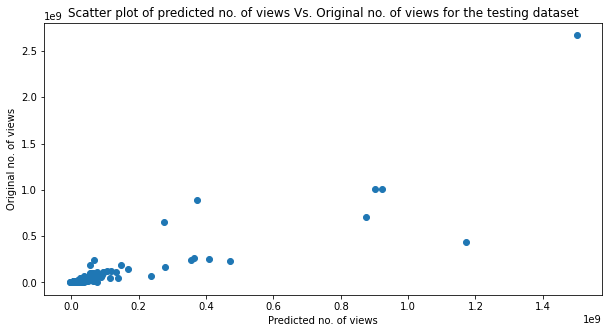

In [63]:
plt.scatter(Y_test_pred_reg,Y_test)
plt.title("Scatter plot of predicted no. of views Vs. Original no. of views for the testing dataset")
plt.xlabel("Predicted no. of views")
plt.ylabel("Original no. of views")
plt.show()

### Computing the $R^2$ values for these predicted no of views and original no of views for both training and testing datasets

In [64]:
print("Training dataset:\t{:0.3f}".format(r2_score(Y_train, Y_train_pred_reg)))
print("Testing dataset:\t{:0.3f}".format(r2_score(Y_test, Y_test_pred_reg)))

Training dataset:	0.793
Testing dataset:	0.772


### The R mean squared values are 0.792 and 0.878 which does indicate a good fit of a model trained and tested. Linear regression can be used in predicting the no. of views


## Statistical Analysis


###Importing individual files

In [ ]:
# Importing individual files
US_Videos_df = pd.read_csv('US_youtube_trending_data.csv')
print(US_Videos_df.head(1))


CA_Videos_df = pd.read_csv('CA_youtube_trending_data.csv')
print(CA_Videos_df.head(1))


GB_Videos_df = pd.read_csv('GB_youtube_trending_data.csv')
print(GB_Videos_df.head(1))


IN_Videos_df = pd.read_csv('IN_youtube_trending_data.csv')
print(IN_Videos_df.head(1))

In [66]:
print('Shape of GB File: '+ str(GB_Videos_df.shape))
print('Shape of CA File: '+ str(CA_Videos_df.shape))
print('Shape of US File: '+ str(US_Videos_df.shape))
print('Shape of IN File: '+ str(IN_Videos_df.shape))

Shape of GB File: (124395, 16)
Shape of CA File: (124344, 16)
Shape of US File: (124391, 16)
Shape of IN File: (118435, 16)


### Import data using python json module to match the video category id of each country

In [67]:
#import data using python json module to match the video category id of each country

import json
with open('US_category_id.json','r') as f:
    category_data_us= json.loads(f.read())

with open('CA_category_id.json','r') as f:
    category_data_ca= json.loads(f.read())

with open('GB_category_id.json','r') as f:
    category_data_gb= json.loads(f.read())

with open('IN_category_id.json','r') as f:
    category_data_in= json.loads(f.read())

### Since JSON file is in nested format we used json normalize function from pandas to flatten it and read into data frame

In [68]:
# Since JSON file is in nested format we used json
# normalize function from pandas to flatten it and read into data frame

US_cat = pd.json_normalize(category_data_us,record_path='items')
CA_cat = pd.json_normalize(category_data_ca,record_path='items')
GB_cat = pd.json_normalize(category_data_gb,record_path='items')
IN_cat = pd.json_normalize(category_data_in,record_path='items')

US_cat['id']= US_cat['id'].astype(int)
CA_cat['id']= CA_cat['id'].astype(int)
GB_cat['id']= GB_cat['id'].astype(int)
IN_cat['id']= IN_cat['id'].astype(int)

###Merging dataframe of videos and category for all countries

In [ ]:
#Merging dataframe of videos and category for all countries

US_Videos_df= US_Videos_df.merge(US_cat,how ='left',left_on= 'categoryId',\
                                 right_on='id').rename(columns= {'snippet.title':'category_name'})
CA_Videos_df= CA_Videos_df.merge(CA_cat,how ='left',left_on= 'categoryId',\
                                 right_on='id').rename(columns= {'snippet.title':'category_name'})
GB_Videos_df= GB_Videos_df.merge(GB_cat,how ='left',left_on= 'categoryId',\
                                 right_on='id').rename(columns= {'snippet.title':'category_name'})
IN_Videos_df= IN_Videos_df.merge(IN_cat,how ='left',left_on= 'categoryId',\
                                 right_on='id').rename(columns= {'snippet.title':'category_name'})

print('Shape of GB File: '+ str(GB_Videos_df.shape))
print('Shape of CA File: '+ str(CA_Videos_df.shape))
print('Shape of US File: '+ str(US_Videos_df.shape))
print('Shape of IN File: '+ str(IN_Videos_df.shape))

### Adding a column 'country' to identify country specific information after appending the 4 countries - USA, Great Britain, Canada and India

In [70]:
#Adding a column 'country' to identify country specific information
# after appending the 4 countries - USA, Great Britain, Canada and India

US_Videos_df['country']= 'USA'
CA_Videos_df['country']= 'Canada'
GB_Videos_df['country']= 'Great Britain'
IN_Videos_df['country']= 'India'

### Appending all the countries data into a single dataframe

In [ ]:
# Appending all the countries data into a single dataframe

df_list= [US_Videos_df,CA_Videos_df,GB_Videos_df,IN_Videos_df]
df= pd.concat(df_list).reset_index(drop=True)
print(df.groupby('country')['video_id'].count())

### Data Cleaning


In [ ]:
# Checking for null values in the single dataframe
print(df.isna().sum())

df[df.category_name.isna()].head()
print(df[df.categoryId==29].category_name)

print(df[df.category_name.isna()]['title'].unique())
df.category_name.fillna('Nonprofits & Activism').isna().any()
df.category_name.fillna('Nonprofits & Activism',inplace=True)

df.description.fillna('').isna().any()
df.description.fillna('',inplace=True)

df['publishedAt']=pd.to_datetime(df.publishedAt)
df['publishedAt'] = df['publishedAt'].dt.tz_convert(None)
df['trending_date']=pd.to_datetime(df.trending_date)
df['trending_date'] = df['trending_date'].dt.tz_convert(None)
df['country']= df['country'].astype('category')
print(df.dtypes)

df.rename(columns={"publishedAt": "published_at","categoryId" : "category_id"\
                   ,'des':'description','c_tags':'tags','c_title':'video_title'}, inplace = True)

#Removing the videos with greater like count with respect to the video view count
df[df.likes>df.view_count].sample(2)
df.drop(df[df.likes>df.view_count].index,inplace=True)
df.reset_index(drop=True, inplace=True)

### To find what tags and titles are mostly used in popular categories across the countries


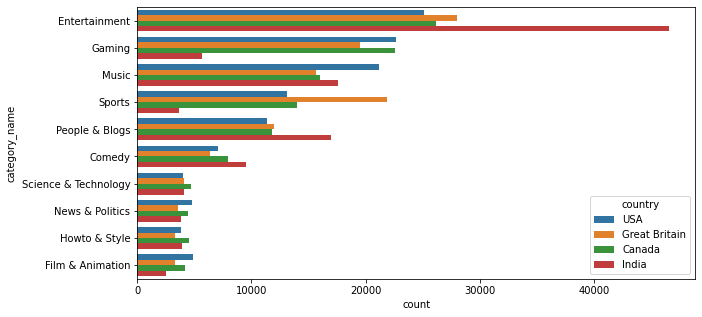

In [73]:
# To find what tags and titles are mostly used in popular categories?
sns.countplot(y='category_name',data=df,hue='country',\
              order=df.category_name.value_counts().iloc[:10].index,hue_order=['USA','Great Britain','Canada','India'])
plt.show()

### Plotting the Time Series over number of videos viewed in a specific category and specific country

### Gaming category has more count in the US in comparison to other countries,analysing the time series

In [ ]:
#To plot the Time Series for each trending date over number of videos
#viewed in a specific category and specific country

# Gaming category has more count in the US in comparison to other countries,
# analysing the time series

df_US = df[df.country == 'USA']
df_US = df_US.drop_duplicates(subset=['video_id'], keep='last')
df_US_category_counts = df_US.groupby(['trending_date', 'category_name'], as_index=False)['view_count'].sum()
df_US_category_counts['trending_date'] = pd.to_datetime(df_US_category_counts['trending_date']).dt.date
df_US_news_count = df_US_category_counts[df_US_category_counts.category_name == 'Gaming']
labels = {'view_count': 'View Count (Millions)', 'trending_date': 'Trending Date'}
fig = px.line(df_US_news_count, x='trending_date', y='view_count', title='View Count Time Series for category: Gaming (USA)', labels=labels)

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title_x=0.5)
fig.show()

### Entertainment category has more count in the India in comparison to other countries, analysing the time series

In [ ]:
# Entertainment category has more count in the India in comparison to other countries,
# analysing the time series

df_IN = df[df.country == 'India']
df_IN = df_IN.drop_duplicates(subset=['video_id'], keep='last')
df_IN_category_counts = df_IN.groupby(['trending_date', 'category_name'], as_index=False)['view_count'].sum()
df_IN_category_counts['trending_date'] = pd.to_datetime(df_IN_category_counts['trending_date']).dt.date
df_IN_news_count = df_IN_category_counts[df_IN_category_counts.category_name == 'People & Blogs']
labels = {'view_count': 'View Count (Millions)', 'trending_date': 'Trending Date'}
fig = px.line(df_IN_news_count, x='trending_date', y='view_count', title='View Count Time Series for category: People & Blogs (India)', labels=labels)

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title_x=0.5)
fig.show()

### Sports category has more count in the Great Britain in comparison to other countries analysing the time series

In [ ]:
# Sports category has more count in the Great Britain in comparison to other countries
# analysing the time series

df_GB = df[df.country == 'Great Britain']
df_GB = df_GB.drop_duplicates(subset=['video_id'], keep='last')
df_GB_category_counts = df_GB.groupby(['trending_date', 'category_name'], as_index=False)['view_count'].sum()
df_GB_category_counts['trending_date'] = pd.to_datetime(df_GB_category_counts['trending_date']).dt.date
df_GB_news_count = df_GB_category_counts[df_GB_category_counts.category_name == 'Sports']
labels = {'view_count': 'View Count (Millions)', 'trending_date': 'Trending Date'}
fig = px.line(df_GB_news_count, x='trending_date', y='view_count', title='View Count Time Series for category: Sports (Great Britian)', labels=labels)

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title_x=0.5)
fig.show()

### Howto & Style category has more count in the Canada in comparison to other countries,analysing the time series

In [ ]:
# Howto & Style category has more count in the Canada in comparison to other countries,
# analysing the time series
df_CA = df[df.country == 'Canada']
df_CA = df_CA.drop_duplicates(subset=['video_id'], keep='last')
df_CA_category_counts = df_CA.groupby(['trending_date', 'category_name'], as_index=False)['view_count'].sum()
df_CA_category_counts['trending_date'] = pd.to_datetime(df_CA_category_counts['trending_date']).dt.date
df_CA_news_count = df_CA_category_counts[df_CA_category_counts.category_name == 'Comedy']
labels = {'view_count': 'View Count (Millions)', 'trending_date': 'Trending Date'}
fig = px.line(df_CA_news_count, x='trending_date', y='view_count', title='View Count Time Series for category: Comedy (Canada)', labels=labels)

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title_x=0.5)
fig.show()

### Adding unwanted words and social media tags to stopword list:

In [79]:
plt.rcParams['figure.figsize'] = [10, 5]

# Adding unwanted words and social media tags to stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['follow', 'twitter', 'social', 'instagram', 'subscribe', 'snapchat', 'youtube', 'videos', 'video'\
                  ,'channel', 'share', 'facebook', 'comment', 'like', 'take', 'go', 'got', 'back',\
                  'much', 'made', 'keep', 'watch','none', 'check', 'will', 'make'])
def generate_wordcloud(text, stop_words):
    wordcloud = WordCloud(stopwords=stop_words,max_font_size=50, max_words=150, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### We saw a sudden spike(gaming category) in the view count around May in the USA, analysing the factor which made the increase in viewership. Fortnite and Minecraft games updates were released

In [ ]:
# We saw a sudden spike(gaming category) in the view count around May in the USA,
#analysing the factor which made the increase in viewership.
#Fortnite and Minecraft games updates were released

category = 'Gaming'
dateMask = (df_US.trending_date > pd.Timestamp(2021,5,20)) & (df_US.trending_date < pd.Timestamp(2021,5,30))


tag_text = " ".join(text for text in df_US.tags[(df_US.category_name == category ) & (dateMask)])
title_text = " ".join(text for text in df_US.title[(df_US.category_name == category ) & (dateMask) ])
tag_title_text = tag_text + ' ' + title_text
generate_wordcloud(tag_title_text, stopwords)

### We saw a sudden spike(People &Blogs category) in the view count around June in India, analysing the factor which made the increase in viewership Sadhguru Birds and Salons were the most popular tags in June 2021

In [ ]:
# We saw a sudden spike(People &Blogs category) in the view count around June in India,
#analysing the factor which made the increase in viewership.
# Sadhguru Birds and Salons were the most popular tags in June 2021

category = 'People & Blogs'
dateMask = (df_IN.trending_date > pd.Timestamp(2021,6,13)) & (df_IN.trending_date < pd.Timestamp(2021,6,16))


tag_text = " ".join(text for text in df_IN.tags[(df_US.category_name == category ) & (dateMask)])
title_text = " ".join(text for text in df_IN.title[(df_IN.category_name == category ) & (dateMask) ])
tag_title_text = tag_text + ' ' + title_text
generate_wordcloud(tag_title_text, stopwords)

### We saw a sudden spike(Sports category) in the view count around Feb in Great Britain,analysing the factor which made the increase in viewership. Football Premier league and Formula 1  in the month of Feb were the most viewed tags

In [ ]:
# We saw a sudden spike(Sports category) in the view count around Feb in Great Britain,
#analysing the factor which made the increase in viewership.
# Football premier league in the month of Feb

category = 'Sports'
dateMask = (df_GB.trending_date > pd.Timestamp(2022,2,20)) & (df_GB.trending_date < pd.Timestamp(2022,2,25))


tag_text = " ".join(text for text in df_GB.tags[(df_GB.category_name == category ) & (dateMask)])
title_text = " ".join(text for text in df_GB.title[(df_GB.category_name == category ) & (dateMask) ])
tag_title_text = tag_text + ' ' + title_text
generate_wordcloud(tag_title_text, stopwords)

### We saw a sudden spike(Comedy category) in the view count around July in Canada, analysing the factor which made the increase in viewership.

### Canadians watched a number of late night shows and multiple comedy videos

In [ ]:
# We saw a sudden spike(Comedy category) in the view count around July in Canada,
#analysing the factor which made the increase in viewership.

category = 'Comedy'
dateMask = (df_CA.trending_date > pd.Timestamp(2021,7,15)) & (df_CA.trending_date < pd.Timestamp(2021,7,20))


tag_text = " ".join(text for text in df_CA.tags[(df_CA.category_name == category ) & (dateMask)])
title_text = " ".join(text for text in df_CA.title[(df_CA.category_name == category ) & (dateMask) ])
tag_title_text = tag_text + ' ' + title_text
generate_wordcloud(tag_title_text, stopwords)